In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('menu.csv')

In [4]:
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [5]:
for column in df.columns:
    df = df.rename(columns={column : column.replace("(% Daily Value)", "DV")} )
for column in df.columns:
    df = df.rename(columns={column : column.replace(" ", "_")})
    
if 'Serving_Size' in df.columns:
    df['Serving_Size_g'] = None
    for i,value in enumerate(df['Serving_Size']):
        if (value.find('fl') < 0 and value.find('ml') < 0):
            value = (value[value.find("(")+1:value.find(" g")])
            df['Serving_Size_g'][i] = np.float64(value)
            df['Serving_Size'][i] = None
        else:
            if (value.find(' fl') > 0):
                df['Serving_Size'][i] = (np.float64(value[0:value.find(' fl')]) * 29.57)
            elif (value.find(' ml') > 0):
                df['Serving_Size'][i] = np.float64(value[value.find(' ml')-3:value.find(' ml')])

    df = df.rename(columns={"Serving_Size": "Serving_Size_ml"})

    if (df.columns.tolist()[3] != "Serving_Size_g"):
        cols = df.columns.tolist()
        cols = cols[:3] + cols[-1:] + cols[-22:-1]
        df = df[cols]

    df['Serving_Size_g'] = np.float64(df['Serving_Size_g'])
    df['Serving_Size_ml'] = np.float64(df['Serving_Size_ml'])

display(df.dtypes)

Category              object
Item                  object
Serving_Size_ml      float64
Serving_Size_g       float64
Calories               int64
Calories_from_Fat      int64
Total_Fat            float64
Total_Fat_DV           int64
Saturated_Fat        float64
Saturated_Fat_DV       int64
Trans_Fat            float64
Cholesterol            int64
Cholesterol_DV         int64
Sodium                 int64
Sodium_DV              int64
Carbohydrates          int64
Carbohydrates_DV       int64
Dietary_Fiber          int64
Dietary_Fiber_DV       int64
Sugars                 int64
Protein                int64
Vitamin_A_DV           int64
Vitamin_C_DV           int64
Calcium_DV             int64
Iron_DV                int64
dtype: object

In [6]:
df.shape

(260, 25)

In [7]:
df = df[df['Category'].isin(['Beef & Pork'])]

df.shape

(15, 25)

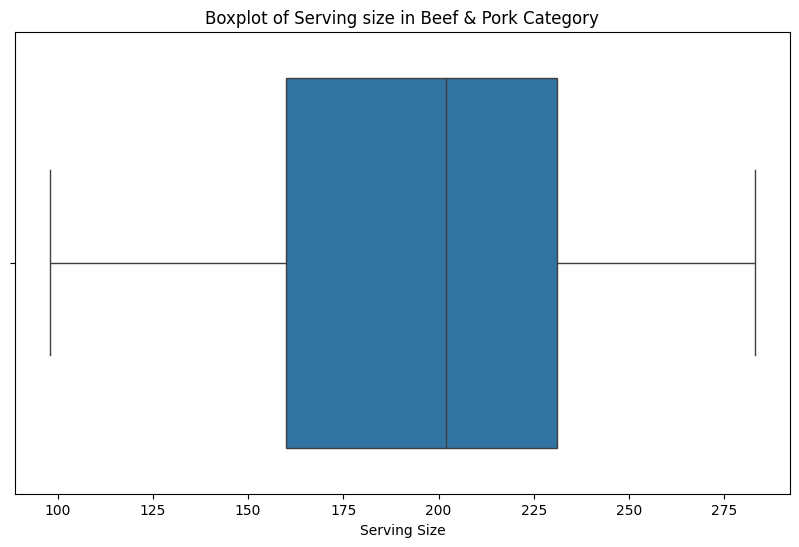

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Serving_Size_g')
plt.title('Boxplot of Serving size in Beef & Pork Category')
plt.xlabel('Serving Size')
plt.show()

In [11]:
max_calories_index = df['Calories'].idxmax()

item_with_most_calories = df.loc[max_calories_index, 'Item']
max_calories = df.loc[max_calories_index, 'Calories']

print(f"The item with the most calories in the Beef and Pork category is '{item_with_most_calories}' with {max_calories} calories.")

The item with the most calories in the Beef and Pork category is 'Double Quarter Pounder with Cheese' with 750 calories.


In [12]:
max_calories_from_fat_index = df['Calories_from_Fat'].idxmax()

item_with_most_calories_from_fat = df.loc[max_calories_from_fat_index, 'Item']
max_calories_from_fat = df.loc[max_calories_from_fat_index, 'Calories_from_Fat']

print(f"The item with the most calories from fat in the Beef and Pork category is '{item_with_most_calories_from_fat}' with {max_calories_from_fat} calories.")

The item with the most calories from fat in the Beef and Pork category is 'Double Quarter Pounder with Cheese' with 380 calories.


In [13]:
max_fat_index = df['Total_Fat'].idxmax()

item_with_most_fat = df.loc[max_fat_index, 'Item']
max_fat = df.loc[max_fat_index, 'Total_Fat']

print(f"The item with the most fat in the Beef and Pork category is '{item_with_most_fat}' with {max_fat} fats.")

The item with the most fat in the Beef and Pork category is 'Double Quarter Pounder with Cheese' with 43.0 fats.


In [14]:
max_Saturated_Fat_index = df['Saturated_Fat'].idxmax()

item_with_most_Saturated_fat = df.loc[max_Saturated_Fat_index, 'Item']
max_saturated_fat = df.loc[max_Saturated_Fat_index, 'Saturated_Fat']

print(f"The item with the most saturated fat in the Beef and Pork category is '{item_with_most_Saturated_fat}' with {max_saturated_fat} fats.")

The item with the most saturated fat in the Beef and Pork category is 'Double Quarter Pounder with Cheese' with 19.0 fats.


In [15]:
max_Cholesterol_index = df['Cholesterol'].idxmax()

item_with_most_Cholesterol = df.loc[max_Cholesterol_index, 'Item']
max_Cholesterol = df.loc[max_Cholesterol_index, 'Cholesterol']

print(f"The item with the most Cholestrol in the Beef and Pork category is '{item_with_most_Cholesterol}' with {max_Cholesterol} ")

The item with the most Cholestrol in the Beef and Pork category is 'Double Quarter Pounder with Cheese' with 160 


In [16]:
max_Sodium_index = df['Sodium'].idxmax()

item_with_most_Sodium = df.loc[max_Sodium_index, 'Item']
max_Sodium = df.loc[max_Sodium_index, 'Sodium']

print(f"The item with the most Sodium in the Beef and Pork category is '{item_with_most_Sodium}' with {max_Sodium} ")

The item with the most Sodium in the Beef and Pork category is 'Bacon Clubhouse Burger' with 1470 


In [17]:
max_Carbohydrates_index = df['Carbohydrates'].idxmax()

item_with_most_Carbohydrates = df.loc[max_Carbohydrates_index, 'Item']
max_Carbohydrates = df.loc[max_Carbohydrates_index, 'Carbohydrates']

print(f"The item with the most Carbohydrates in the Beef and Pork category is '{item_with_most_Carbohydrates}' with {max_Carbohydrates} ")

The item with the most Carbohydrates in the Beef and Pork category is 'Bacon Clubhouse Burger' with 51 


In [18]:
max_Sugars_index = df['Sugars'].idxmax()

item_with_most_Sugars = df.loc[max_Sugars_index, 'Item']
max_Sugars = df.loc[max_Sugars_index, 'Sugars']

print(f"The item with the most Sugars in the Beef and Pork category is '{item_with_most_Sugars}' with {max_Sugars} ")

The item with the most Sugars in the Beef and Pork category is 'Bacon Clubhouse Burger' with 14 


In [19]:
max_Protein_index = df['Protein'].idxmax()

item_with_most_Protein = df.loc[max_Protein_index, 'Item']
max_Protein = df.loc[max_Protein_index, 'Protein']

print(f"The item with the most Protein in the Beef and Pork category is '{item_with_most_Protein}' with {max_Protein} ")

The item with the most Protein in the Beef and Pork category is 'Double Quarter Pounder with Cheese' with 48 


In [20]:
max_Dietary_Fiber_index = df['Dietary_Fiber'].idxmax()

item_with_most_Dietary_Fiber = df.loc[max_Dietary_Fiber_index, 'Item']
max_Dietary_Fiber = df.loc[max_Dietary_Fiber_index, 'Dietary_Fiber']

print(f"The item with the most Dietary Fiber in the Beef and Pork category is '{item_with_most_Dietary_Fiber}' with {max_Dietary_Fiber} ")

The item with the most Dietary Fiber in the Beef and Pork category is 'Bacon Clubhouse Burger' with 4 
